In [1]:
import numpy as np

In [25]:
x=np.array([0,1])
y_xnor=np.array([1,0,0,1])
y_xor=np.array([0,1,1,0])
y_and=np.array([0,0,0,1])
y_or=np.array([0,1,1,1])
y_nand=np.array([1,1,1,0])
y_nor=np.array([1,0,0,0])
y_taut=np.array([1,1,1,1])

In [47]:
def gradient_descent(x,y_test):
    y_pred=np.empty(4)
    lr=0.1
    w1=np.random.randn()
    w2=np.random.randn()
    b=np.random.randn()
    print(" weights and bias before gradient descent")
    print(w1,'\n',w2,'\n',b,'\n')
    for k in range(1000):
        count=0
        for i in x:
            for j in x:
                y=(i*w1)+(j*w2)+b
                if y>=0:
                    y=1
                else:
                    y=0
                y_pred[count]=y
                dw1=(-2/4)*i*(y_test[count]-y)
                dw2=(-2/4)*j*(y_test[count]-y)
                db=(-2/4)*(y_test[count]-y)

                w1=w1-(lr*dw1)
                w2=w2-(lr*dw2)
                b=b-(lr*db)
                count+=1
    print(" weights and bias after gradient descent")
    print(w1,'\n',w2,'\n',b,'\n')
    print("\n Actual value : ",y_test)
    print("\n Predicted value : ",y_pred)
    return w1,w2,b

# XOR

In [48]:
w1,w2,b=gradient_descent(x,y_and)

 weights and bias before gradient descent
-0.7976888746891546 
 -0.9469477733612798 
 -0.1327842950832236 

 weights and bias after gradient descent
0.10231112531084553 
 0.0530522266387205 
 -0.1327842950832236 


 Actual value :  [0 0 0 1]

 Predicted value :  [0. 0. 0. 1.]


# XNOR

In [56]:
w11,w21,b1=gradient_descent(x,y_or)

 weights and bias before gradient descent
0.8517777019165087 
 -1.1181317744480226 
 0.7879248327873158 

 weights and bias after gradient descent
0.8517777019165087 
 0.03186822555197788 
 -0.012075167212684298 


 Actual value :  [0 1 1 1]

 Predicted value :  [0. 1. 1. 1.]


In [57]:
x1=np.dstack((y_nand,y_or)).reshape(4,2)
x2=np.dstack((y_and,y_nor)).reshape(4,2)
weights1=np.array([w1,w2])
weights2=np.array([w11,w21])

In [69]:
y_pred_xor = np.where((np.dot(x1, weights1) + b)>=0,1,0)
print("XOR : ",y_pred_xor)
y_pred_xnor = np.where((np.dot(x2, weights2) + b1)>=0,1,0)
print("XNOR : ",y_pred_xnor)

XOR :  [0 1 1 0]
XNOR :  [1 0 0 1]


# Single layered Perceptron for MNIST


In [67]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import tensorflow as tf

(x_train,y_train),(x_test,y_test)=mnist.load_data()

Shape :  (28, 28)


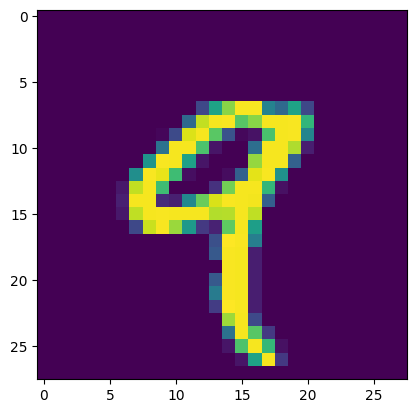

In [68]:
print("Shape : ",x_train[4].shape)
plt.imshow(x_train[4])

In [69]:
x_train=x_train/225.0
x_test=x_test/225.0

In [72]:
input_dim = 28 * 28
x_train = x_train.reshape((-1, input_dim))
x_test = x_test.reshape((-1, input_dim))

In [73]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(input_dim,)),
    tf.keras.layers.Dense(1, activation='sigmoid', use_bias=False)
])

In [74]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: -5409.3970 - accuracy: 0.1124
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: -16232.3818 - accuracy: 0.1124
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: -27055.3613 - accuracy: 0.1124
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: -37878.3320 - accuracy: 0.1124
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: -48701.3008 - accuracy: 0.1124
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: -59524.2500 - accuracy: 0.1124
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: -70347.2109 - accuracy: 0.1124
Epoch 8/20
1875/1875 [==============================] - 3s 1ms/step - loss: -81170.3047 - accuracy: 0.1124
Epoch 9/20
1875/1875 [==============================] - 3s 1ms/step - loss: -91993.1641 - accuracy: 0.1124
Epoch 10/20
1875/1875 [===============

3. We cannot implent Single layer perceptron for mnist dataset since the number of features is itself 10 and perceptron can only be implemented for binary class classification

# Multi-layered Perceptron

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras

(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(-1,28*28)/255.0
x_test=x_test.reshape(-1,28*28)/255.0


y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [5]:
model=Sequential()
model.add(Dense(10,activation='softmax'))

In [7]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2660 - accuracy: 0.9259
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2612 - accuracy: 0.9277
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2582 - accuracy: 0.9286
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2549 - accuracy: 0.9291
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2526 - accuracy: 0.9300
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2506 - accuracy: 0.9311
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2489 - accuracy: 0.9313
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2477 - accuracy: 0.9316
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2460 - accuracy: 0.9320
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.245

# Linear Regression using TF


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras import layers

In [4]:
np.random.seed(42)
tensorflow.random.set_seed(42)

In [15]:
x=np.random.rand(100)*100
noise=np.random.randn(100)*15
y=2.5*x+10+noise

Text(0.5, 1.0, 'Random Linear Data')

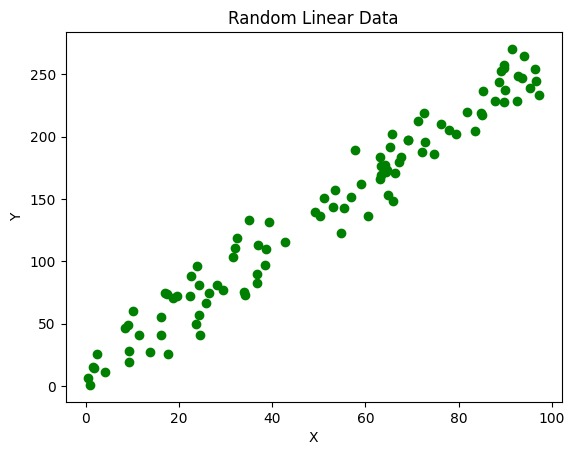

In [16]:
plt.scatter(x,y,c='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Linear Data')

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

model=Sequential(
    layers.Dense(units=1,input_shape=(1,))
)

ModuleNotFoundError: No module named 'sklearn'

In [18]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,loss='mean_squared_error')
model.fit(x,y,epochs=1000)

Epoch 1/1000
4/4 [==============================] - 0s 5ms/step - loss: 7376.8511
Epoch 2/1000
4/4 [==============================] - 0s 3ms/step - loss: 7021.0586
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 6655.3613
Epoch 4/1000
4/4 [==============================] - 0s 2ms/step - loss: 6329.0396
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 5988.3086
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 5650.9458
Epoch 7/1000
4/4 [==============================] - 0s 2ms/step - loss: 5360.5439
Epoch 8/1000
4/4 [==============================] - 0s 3ms/step - loss: 5048.8730
Epoch 9/1000
4/4 [==============================] - 0s 4ms/step - loss: 4779.5806
Epoch 10/1000
4/4 [==============================] - 0s 2ms/step - loss: 4512.5459
Epoch 11/1000
4/4 [==============================] - 0s 3ms/step - loss: 4254.7715
Epoch 12/1000
4/4 [==============================] - 0s 3ms/step - loss: 4012.7163
Epoch 13/1000

4/4 [==============================] - 0s 2ms/step - loss: 218.8507
Epoch 101/1000
4/4 [==============================] - 0s 2ms/step - loss: 218.7893
Epoch 102/1000
4/4 [==============================] - 0s 2ms/step - loss: 218.9411
Epoch 103/1000
4/4 [==============================] - 0s 2ms/step - loss: 218.8242
Epoch 104/1000
4/4 [==============================] - 0s 2ms/step - loss: 218.8310
Epoch 105/1000
4/4 [==============================] - 0s 1ms/step - loss: 218.7731
Epoch 106/1000
4/4 [==============================] - 0s 1ms/step - loss: 218.7351
Epoch 107/1000
4/4 [==============================] - 0s 2ms/step - loss: 218.7046
Epoch 108/1000
4/4 [==============================] - 0s 2ms/step - loss: 218.6817
Epoch 109/1000
4/4 [==============================] - 0s 2ms/step - loss: 218.6664
Epoch 110/1000
4/4 [==============================] - 0s 2ms/step - loss: 218.6747
Epoch 111/1000
4/4 [==============================] - 0s 1ms/step - loss: 218.6507
Epoch 112/1000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 215.5049
Epoch 199/1000
4/4 [==============================] - 0s 3ms/step - loss: 215.5607
Epoch 200/1000
4/4 [==============================] - 0s 2ms/step - loss: 215.4879
Epoch 201/1000
4/4 [==============================] - 0s 2ms/step - loss: 215.4323
Epoch 202/1000
4/4 [==============================] - 0s 2ms/step - loss: 215.4050
Epoch 203/1000
4/4 [==============================] - 0s 2ms/step - loss: 215.3504
Epoch 204/1000
4/4 [==============================] - 0s 2ms/step - loss: 215.1960
Epoch 205/1000
4/4 [==============================] - 0s 2ms/step - loss: 215.1678
Epoch 206/1000
4/4 [==============================] - 0s 2ms/step - loss: 215.0310
Epoch 207/1000
4/4 [==============================] - 0s 2ms/step - loss: 215.0373
Epoch 208/1000
4/4 [==============================] - 0s 2ms/step - loss: 215.0787
Epoch 209/1000
4/4 [==============================] - 0s 2ms/step - loss: 215.0336
Epoch 210/1000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 211.3633
Epoch 297/1000
4/4 [==============================] - 0s 2ms/step - loss: 211.3795
Epoch 298/1000
4/4 [==============================] - 0s 3ms/step - loss: 211.3091
Epoch 299/1000
4/4 [==============================] - 0s 2ms/step - loss: 211.1384
Epoch 300/1000
4/4 [==============================] - 0s 3ms/step - loss: 211.1233
Epoch 301/1000
4/4 [==============================] - 0s 2ms/step - loss: 211.0001
Epoch 302/1000
4/4 [==============================] - 0s 2ms/step - loss: 211.0413
Epoch 303/1000
4/4 [==============================] - 0s 2ms/step - loss: 210.9941
Epoch 304/1000
4/4 [==============================] - 0s 2ms/step - loss: 210.9034
Epoch 305/1000
4/4 [==============================] - 0s 2ms/step - loss: 210.8294
Epoch 306/1000
4/4 [==============================] - 0s 2ms/step - loss: 210.8186
Epoch 307/1000
4/4 [==============================] - 0s 2ms/step - loss: 210.7487
Epoch 308/1000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 206.6990
Epoch 395/1000
4/4 [==============================] - 0s 2ms/step - loss: 206.7226
Epoch 396/1000
4/4 [==============================] - 0s 2ms/step - loss: 206.7007
Epoch 397/1000
4/4 [==============================] - 0s 2ms/step - loss: 206.6314
Epoch 398/1000
4/4 [==============================] - 0s 2ms/step - loss: 206.5895
Epoch 399/1000
4/4 [==============================] - 0s 2ms/step - loss: 206.4420
Epoch 400/1000
4/4 [==============================] - 0s 2ms/step - loss: 206.4023
Epoch 401/1000
4/4 [==============================] - 0s 2ms/step - loss: 206.2845
Epoch 402/1000
4/4 [==============================] - 0s 2ms/step - loss: 206.1858
Epoch 403/1000
4/4 [==============================] - 0s 1ms/step - loss: 206.0319
Epoch 404/1000
4/4 [==============================] - 0s 2ms/step - loss: 206.0312
Epoch 405/1000
4/4 [==============================] - 0s 2ms/step - loss: 205.9305
Epoch 406/1000
4/4 

4/4 [==============================] - 0s 5ms/step - loss: 201.9431
Epoch 493/1000
4/4 [==============================] - 0s 0s/step - loss: 201.8915
Epoch 494/1000
4/4 [==============================] - 0s 0s/step - loss: 201.7375
Epoch 495/1000
4/4 [==============================] - 0s 5ms/step - loss: 201.6122
Epoch 496/1000
4/4 [==============================] - 0s 0s/step - loss: 201.7239
Epoch 497/1000
4/4 [==============================] - 0s 0s/step - loss: 201.8280
Epoch 498/1000
4/4 [==============================] - 0s 5ms/step - loss: 201.7297
Epoch 499/1000
4/4 [==============================] - 0s 0s/step - loss: 201.7214
Epoch 500/1000
4/4 [==============================] - 0s 0s/step - loss: 202.0359
Epoch 501/1000
4/4 [==============================] - 0s 0s/step - loss: 201.6657
Epoch 502/1000
4/4 [==============================] - 0s 0s/step - loss: 201.5827
Epoch 503/1000
4/4 [==============================] - 0s 0s/step - loss: 201.2917
Epoch 504/1000
4/4 [========

4/4 [==============================] - 0s 1ms/step - loss: 196.9284
Epoch 592/1000
4/4 [==============================] - 0s 1ms/step - loss: 196.8727
Epoch 593/1000
4/4 [==============================] - 0s 1ms/step - loss: 196.7966
Epoch 594/1000
4/4 [==============================] - 0s 1ms/step - loss: 196.7990
Epoch 595/1000
4/4 [==============================] - 0s 1ms/step - loss: 196.7208
Epoch 596/1000
4/4 [==============================] - 0s 1ms/step - loss: 196.6445
Epoch 597/1000
4/4 [==============================] - 0s 1ms/step - loss: 196.5804
Epoch 598/1000
4/4 [==============================] - 0s 2ms/step - loss: 196.5748
Epoch 599/1000
4/4 [==============================] - 0s 1ms/step - loss: 196.3212
Epoch 600/1000
4/4 [==============================] - 0s 2ms/step - loss: 196.4713
Epoch 601/1000
4/4 [==============================] - 0s 2ms/step - loss: 196.4850
Epoch 602/1000
4/4 [==============================] - 0s 2ms/step - loss: 196.5530
Epoch 603/1000
4/4 

4/4 [==============================] - 0s 0s/step - loss: 192.5780
Epoch 691/1000
4/4 [==============================] - 0s 5ms/step - loss: 192.5529
Epoch 692/1000
4/4 [==============================] - 0s 0s/step - loss: 192.5298
Epoch 693/1000
4/4 [==============================] - 0s 6ms/step - loss: 192.5144
Epoch 694/1000
4/4 [==============================] - 0s 2ms/step - loss: 192.4619
Epoch 695/1000
4/4 [==============================] - 0s 3ms/step - loss: 192.4375
Epoch 696/1000
4/4 [==============================] - 0s 2ms/step - loss: 192.4180
Epoch 697/1000
4/4 [==============================] - 0s 4ms/step - loss: 192.4509
Epoch 698/1000
4/4 [==============================] - 0s 3ms/step - loss: 192.5081
Epoch 699/1000
4/4 [==============================] - 0s 2ms/step - loss: 192.4964
Epoch 700/1000
4/4 [==============================] - 0s 2ms/step - loss: 192.4859
Epoch 701/1000
4/4 [==============================] - 0s 3ms/step - loss: 193.0679
Epoch 702/1000
4/4 [=

4/4 [==============================] - 0s 4ms/step - loss: 189.6519
Epoch 789/1000
4/4 [==============================] - 0s 2ms/step - loss: 189.4442
Epoch 790/1000
4/4 [==============================] - 0s 1ms/step - loss: 189.5297
Epoch 791/1000
4/4 [==============================] - 0s 495us/step - loss: 189.4364
Epoch 792/1000
4/4 [==============================] - 0s 3ms/step - loss: 189.3880
Epoch 793/1000
4/4 [==============================] - 0s 2ms/step - loss: 189.2556
Epoch 794/1000
4/4 [==============================] - 0s 2ms/step - loss: 189.3109
Epoch 795/1000
4/4 [==============================] - 0s 2ms/step - loss: 189.4710
Epoch 796/1000
4/4 [==============================] - 0s 2ms/step - loss: 189.7001
Epoch 797/1000
4/4 [==============================] - 0s 2ms/step - loss: 190.6295
Epoch 798/1000
4/4 [==============================] - 0s 2ms/step - loss: 190.9150
Epoch 799/1000
4/4 [==============================] - 0s 1ms/step - loss: 191.1064
Epoch 800/1000
4/

4/4 [==============================] - 0s 0s/step - loss: 187.6463
Epoch 888/1000
4/4 [==============================] - 0s 0s/step - loss: 188.2949
Epoch 889/1000
4/4 [==============================] - 0s 0s/step - loss: 188.5098
Epoch 890/1000
4/4 [==============================] - 0s 0s/step - loss: 188.4017
Epoch 891/1000
4/4 [==============================] - 0s 0s/step - loss: 187.6679
Epoch 892/1000
4/4 [==============================] - 0s 0s/step - loss: 186.9644
Epoch 893/1000
4/4 [==============================] - 0s 0s/step - loss: 186.2523
Epoch 894/1000
4/4 [==============================] - 0s 0s/step - loss: 188.5410
Epoch 895/1000
4/4 [==============================] - 0s 0s/step - loss: 189.7165
Epoch 896/1000
4/4 [==============================] - 0s 0s/step - loss: 190.3704
Epoch 897/1000
4/4 [==============================] - 0s 0s/step - loss: 189.9875
Epoch 898/1000
4/4 [==============================] - 0s 0s/step - loss: 189.0692
Epoch 899/1000
4/4 [===========

4/4 [==============================] - 0s 0s/step - loss: 185.0660
Epoch 987/1000
4/4 [==============================] - 0s 5ms/step - loss: 185.0645
Epoch 988/1000
4/4 [==============================] - 0s 0s/step - loss: 185.0644
Epoch 989/1000
4/4 [==============================] - 0s 5ms/step - loss: 185.1106
Epoch 990/1000
4/4 [==============================] - 0s 0s/step - loss: 184.9895
Epoch 991/1000
4/4 [==============================] - 0s 5ms/step - loss: 185.0349
Epoch 992/1000
4/4 [==============================] - 0s 0s/step - loss: 185.0545
Epoch 993/1000
4/4 [==============================] - 0s 5ms/step - loss: 185.1814
Epoch 994/1000
4/4 [==============================] - 0s 0s/step - loss: 185.2098
Epoch 995/1000
4/4 [==============================] - 0s 5ms/step - loss: 185.0233
Epoch 996/1000
4/4 [==============================] - 0s 0s/step - loss: 184.9588
Epoch 997/1000
4/4 [==============================] - 0s 5ms/step - loss: 184.7489
Epoch 998/1000
4/4 [=====

In [24]:
weights=model.get_weights()
weight,bias=weights[0].flatten()[0],weights[1].flatten()[0]
score=model.evaluate(x,y,verbose=0)

In [25]:
print("Weights: ",weight)
print("Bias: ",bias)
print('Loss: ',score)

Weights:  2.5020201
Bias:  9.838239
Loss:  185.8990478515625
